In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow.keras
import cv2

#importing the Deep learning libraries
from tensorflow.keras.utils import load_img , img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

## Displaying Images

In [ ]:
picture_size = 48

folder_path = "/content/drive/MyDrive/internship/archive/train/"


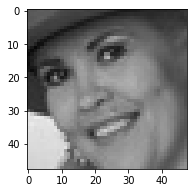

In [ ]:
expression = 'happy'

plt.figure(figsize=(10,10))
for i in range(1,10,1):
  plt.subplot(3,3,1)
  img = load_img(folder_path+"train/"+expression+"/"+os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
  plt.imshow(img)
plt.show()

In [ ]:
folder_path = "/content/drive/MyDrive/internship/archive/train/"
for filename in os.listdir(folder_path):
  #for filename in os.listdir(train)
    if filename.endswith('.jpg') or filename.endswith('.png'):  # check if file is an image
        filepath = os.path.join(folder_path, filename)
        img = cv2.imread(filepath)
        plt.imshow(img)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

X = []
count = 0

path = "/content/drive/MyDrive/internship/archive/train/" 
leng=os.listdir(path)
for i in range(len(leng)):
  
  expression =leng[i]
  newimg=os.listdir(path+expression)
  for img in newimg:
      data=path+expression+'/'+newimg[1]
      
      image = cv2.imread(data)
      plt.imshow(image)
      try:
          image = cv2.resize(image, (7, 7), interpolation=cv2.INTER_AREA)
          print(image.shape)
      except:
          break
      X.append([image])
      count = count +1
  print(count)


  # # Display resized image
  # plt.imshow(image)
  # cv2.waitKey(0)
  # cv2.destroyAllWindows()

# # Convert the image to float32 data type
# imag = np.float32(imag)

# # Normalize the image to have zero mean and unit variance
# img_normalized = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# # Convert the normalized image to uint8 data type
# img_normalized = np.uint8(img_normalized * 255)

# # Display the original and normalized images
# cv2.imshow('Original Image', img)
# cv2.imshow('Normalized Image', img_normalized)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# # Crop image
# x, y, w, h = (225, 225, 8, 8) # define the region of interest
# cropped_img = img[y:y+h, x:x+w]

# # Display cropped image
# plt.imshow(cropped_img)
# cv2.waitKey(0)



In [ ]:
path

'/content/drive/MyDrive/internship/archive/train/'

In [ ]:
batch_size  = 128

datagen_train = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen_val = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)# randomly flip images

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 14888 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


(1488, 48, 48, 1)
(1488, 48, 48, 1)
(1488, 48, 48, 1)
(1488, 48, 48, 1)


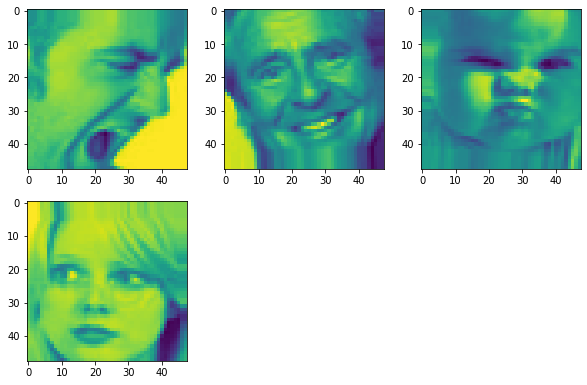

In [ ]:
plt.figure(figsize= (10,10))
for i in range(1,5,1):
    img, label = train_set.next()
    print(img.shape)   #  (128,48,48,1)
    plt.subplot(3,3,i)
    plt.imshow(img[1])
plt.show()

# CNN Architecture

In [ ]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(256,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))





In [ ]:
opt = Adam(lr = 0.0001)
model.compile(optimizer=Adam(learning_rate = 0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

## Compile model

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate =0.001),
              metrics=['accuracy'])

## Train the model

In [ ]:
history = model.fit(x=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=10,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size
                                callbacks=callbacks_list
                                )

Epoch 1/10
10/10 [==============================] - 3015s 307s/step - loss: 1.9000 - accuracy: 0.3199 - val_loss: 23.7943 - val_accuracy: 0.1720
Epoch 2/10
10/10 [==============================] - 532s 53s/step - loss: 1.3980 - accuracy: 0.4092 - val_loss: 47.6294 - val_accuracy: 0.1720
Epoch 3/10
10/10 [==============================] - 555s 56s/step - loss: 1.3055 - accuracy: 0.4141 - val_loss: 58.8552 - val_accuracy: 0.1720
Epoch 4/10
10/10 [==============================] - 553s 55s/step - loss: 1.3158 - accuracy: 0.3814 - val_loss: 31.4464 - val_accuracy: 0.1724
Epoch 5/10
10/10 [==============================] - 557s 55s/step - loss: 1.2729 - accuracy: 0.4150 - val_loss: 21.7585 - val_accuracy: 0.1720
Epoch 6/10
10/10 [==============================] - 530s 53s/step - loss: 1.2611 - accuracy: 0.4299 - val_loss: 23.2469 - val_accuracy: 0.1610
Epoch 7/10
10/10 [==============================] - 532s 53s/step - loss: 1.2599 - accuracy: 0.4069 - val_loss: 21.7834 - val_accuracy: 0.17